In [1]:
heap.building = function(vec)
{
  len=length(vec)
  heap=vec
  for (j in len:1)
  {
    heap=modify.heap(heap,j)
  }
  return(heap)
}
is.heap = function(heap,root_i)
{
  i=root_i
  res=T
  while(2*i<=length(heap)&res)
  {
    son=c(heap[2*i],heap[2*i+1])
    son=son[!is.na(son)]
    res=all(heap[i]<=son)
    i=i+1
  }
  return(res)
}
modify.heap = function(heap,root_i)
{
  len=length(heap)
  flag=1
  
  while (root_i*2<=len&&flag==1)
  {
    left_i=root_i*2
    right_i=root_i*2+1
    flag=0
    son=c(heap[left_i],heap[right_i])
    son=son[!is.na(son)]
    min_ind=which.min(son)
    if (heap[root_i]>son[min_ind])
    {
      flag=1
      heap_ind=c(left_i,right_i)[min_ind]
      
      tmp=heap[heap_ind]
      heap[heap_ind]=heap[root_i]
      heap[root_i]=tmp
      
      root_i=heap_ind
    }
  }
  return(heap)
}

heap.sort = function(heap)
{
  sorted=NULL
  len=length(heap)
  while(len>0)
  {
    sorted=c(sorted,heap[1])
    len=length(heap)
    heap[1]=heap[len]
    heap=heap[1:(len-1)]
    heap=modify.heap(heap,root_i=1)
    len=len-1
  }
  return(sorted)
}


In [18]:
# time  for heapsort
time = function(x){
  destination = c()
  for(i in c(1:50)){
    n = as.numeric(system.time(heap.sort(heap.building(x)))[1])
    destination = c(destination, n)
  }
  mean_value = mean(destination)
  times = destination
  
  # print(times)
  
  destination
}

In [10]:
#percent function
percent = function(sampl){
  length.sampl = length(sampl)
  unique.sampl = length(unique(sampl))
  percent = 100-floor(100*unique.sampl/length.sampl)
  percent
}

In [11]:
#percents with "%"
percent_strings = function(per.s)
{
  percent.array = sprintf("%i%s",per.s, "%" )
  repeats = c()
  
  for (i in 1:6)
  {
    repeats = c(repeats,rep(percent.array[i],50))
  }
  repeats
}

In [12]:
#percents num
percent_num = function(per.s)
{
 
  repeats = c()
  
  for (i in 1:6)
  {
    repeats = c(repeats,rep(per.s[i],50))
  }
  repeats
}

In [13]:
# create samples
repeat_level1 = sample(1:1000000, 2000, replace=TRUE )

repeat_level2 = sample(1:10000, 2000, replace = TRUE)

repeat_level3 = sample(1000:4500, 2000, replace = TRUE)

repeat_level4 = sample(1000:2000, 2000, replace = TRUE)

repeat_level5 = sample(1000:1500, 2000, replace = TRUE)

repeat_level6 = sample(1000:1100, 2000, replace = TRUE)

In [15]:
percents = c(percent(repeat_level1),
             percent(repeat_level2),
             percent(repeat_level3),
             percent(repeat_level4),
             percent(repeat_level5),
             percent(repeat_level6))
percents

[1]  1  9 23 57 76 95

In [27]:
times = vector(mode = "list", length = 6)
times[[1]] = time(repeat_level1)
times[[2]] = time(repeat_level2)
times[[3]] = time(repeat_level3)
times[[4]] = time(repeat_level4)
times[[5]] = time(repeat_level5)
times[[6]] = time(repeat_level6)
times

[[1]]
 [1] 0.07 0.06 0.08 0.08 0.06 0.14 0.08 0.13 0.14 0.10 0.10 0.09 0.08 0.08 0.09
[16] 0.06 0.06 0.08 0.09 0.09 0.13 0.12 0.14 0.07 0.10 0.08 0.07 0.06 0.09 0.07
[31] 0.06 0.06 0.10 0.07 0.08 0.13 0.11 0.09 0.08 0.06 0.11 0.10 0.15 0.11 0.06
[46] 0.06 0.09 0.15 0.07 0.06

[[2]]
 [1] 0.13 0.06 0.08 0.14 0.13 0.20 0.19 0.09 0.06 0.07 0.07 0.08 0.08 0.07 0.11
[16] 0.07 0.07 0.09 0.07 0.07 0.07 0.10 0.13 0.14 0.16 0.10 0.08 0.08 0.11 0.06
[31] 0.06 0.14 0.11 0.11 0.07 0.07 0.07 0.07 0.13 0.14 0.08 0.09 0.14 0.06 0.06
[46] 0.06 0.08 0.06 0.06 0.06

[[3]]
 [1] 0.08 0.11 0.09 0.08 0.06 0.08 0.13 0.08 0.06 0.06 0.08 0.09 0.08 0.08 0.08
[16] 0.10 0.10 0.08 0.09 0.08 0.13 0.14 0.11 0.08 0.10 0.11 0.06 0.06 0.08 0.08
[31] 0.13 0.14 0.16 0.13 0.13 0.14 0.18 0.12 0.09 0.14 0.10 0.11 0.10 0.09 0.08
[46] 0.08 0.12 0.11 0.11 0.13

[[4]]
 [1] 0.08 0.14 0.11 0.08 0.06 0.06 0.08 0.08 0.11 0.15 0.09 0.07 0.13 0.13 0.12
[16] 0.11 0.18 0.10 0.08 0.06 0.06 0.06 0.08 0.12 0.15 0.09 0.13 0.08 0.09 0.10
[31] 0.07 0.07 0.07 0.08 0.09 0.06 0.10 0.09 0.14 0.11 0.13 0.09 0.14 0.10 0.08
[46] 0.08 0.12 0.09 0.14 0.14

[[5]]
 [1] 0.11 0.10 0.10 0.10 0.13 0.08 0.10 0.11 0.11 0.14 0.17 0.10 0.08 0.08 0.08
[16] 0.06 0.08 0.10 0.17 0.14 0.10 0.06 0.06 0.08 0.14 0.10 0.08 0.08 0.08 0.09
[31] 0.08 0.07 0.10 0.07 0.07 0.07 0.12 0.16 0.07 0.07 0.08 0.12 0.08 0.08 0.08
[46] 0.08 0.11 0.11 0.06 0.08

[[6]]
 [1] 0.09 0.10 0.08 0.08 0.08 0.11 0.08 0.08 0.11 0.13 0.14 0.11 0.08 0.06 0.14
[16] 0.16 0.14 0.11 0.09 0.15 0.17 0.17 0.14 0.12 0.09 0.06 0.06 0.08 0.11 0.07
[31] 0.08 0.11 0.13 0.06 0.15 0.09 0.09 0.09 0.14 0.07 0.06 0.12 0.08 0.08 0.09
[46] 0.08 0.08 0.08 0.06 0.06

In [33]:
times.array = c()
for (i in 1:6)
    {
    times.array = c(times.array,times[[i]])
    }

In [35]:
#create data
percent.string = percent_strings(percents)
datas = data.frame(times.array, percent.string)
datas

times.array,percent.string
0.07,1%
0.06,1%
0.08,1%
0.08,1%
0.06,1%
0.14,1%
0.08,1%
0.13,1%
0.14,1%
0.10,1%


In [36]:
str(datas)

'data.frame':	300 obs. of  2 variables:
 $ times.array   : num  0.07 0.06 0.08 0.08 0.06 ...
 $ percent.string: Factor w/ 6 levels "1%","23%","57%",..: 1 1 1 1 1 1 1 1 1 1 ...


In [37]:
percent.num = percent_num(percents)
## 
datass = data.frame(times.array,percent.num)
str(datass)

'data.frame':	300 obs. of  2 variables:
 $ times.array: num  0.07 0.06 0.08 0.08 0.06 ...
 $ percent.num: num  1 1 1 1 1 1 1 1 1 1 ...


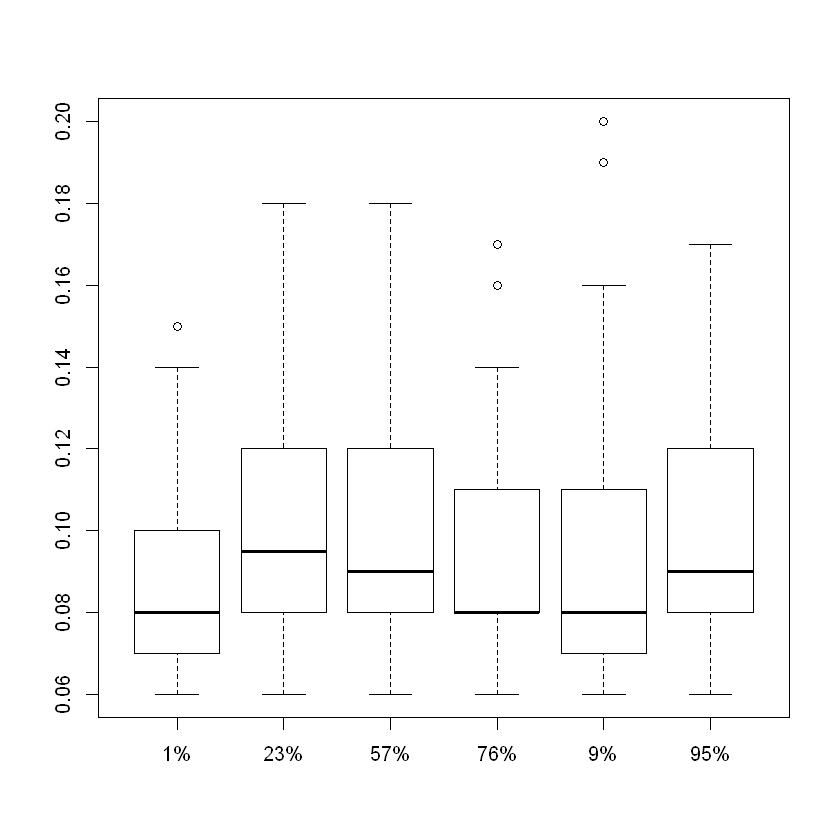

In [38]:
boxplot(times.array ~ percent.string, data = datas)

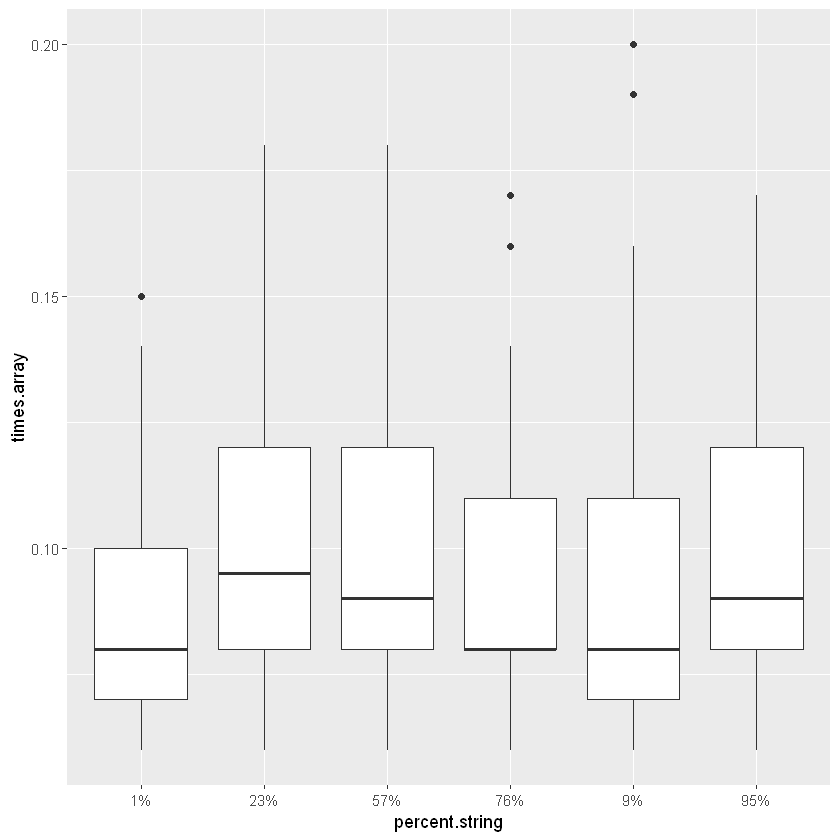

In [43]:
#the same plot but through ggplot
library(ggplot2)

ggplot(datas, aes(x = percent.string, y = times.array)) + geom_boxplot()

Warning message in is.na(e1):
"is.na() применен к не-списку/вектору типа 'closure'"

ERROR: Error in `==.default`(factor, datas$percent.string[1]): сравнение (1) возможно только для элементарных и списковых типов


In [44]:
result = aov(times.array ~ percent.string, data = datas)
summary(result) ## p-value > 0.05 cant break that times are the same
## repeats dont inluence on times

                Df  Sum Sq   Mean Sq F value Pr(>F)
percent.string   5 0.00453 0.0009059   1.012  0.411
Residuals      294 0.26315 0.0008951               

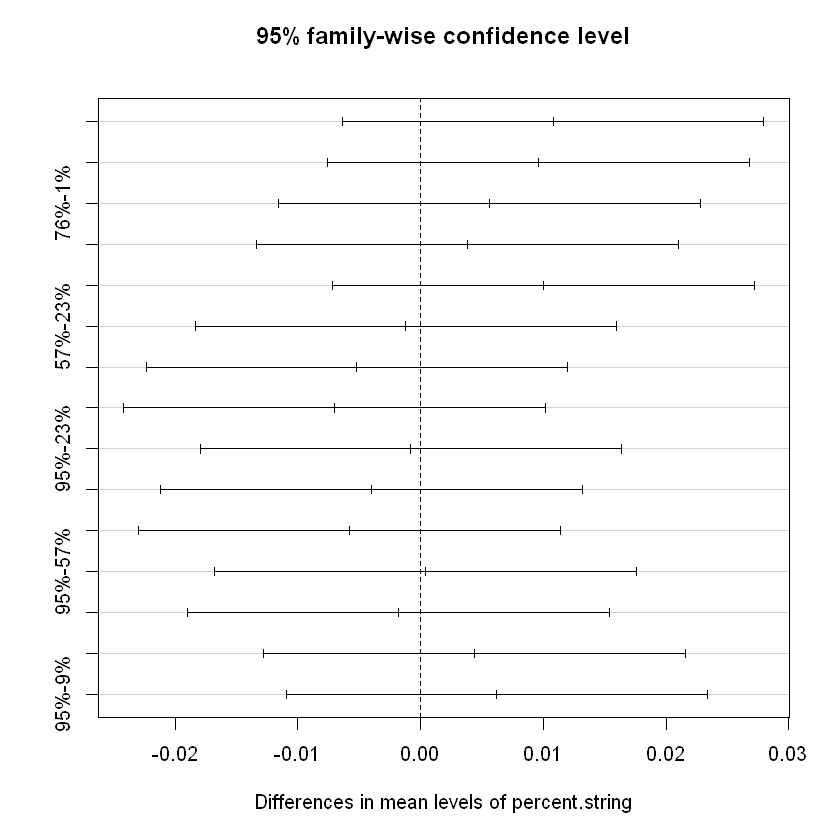

In [45]:
# how diference between every 2 factors
tuk = TukeyHSD(result)
plot(TukeyHSD(result))

In [46]:
# means model
model.tables(result, "means")

Tables of means
Grand mean
           
0.09643333 

 percent.string 
percent.string
    1%    23%    57%    76%     9%    95% 
0.0898 0.1006 0.0994 0.0954 0.0936 0.0998 